In [192]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training.csv', 'test (1).csv', 'sample_submission (2).csv']


In [193]:
#removing unnecessary
import warnings
warnings.filterwarnings('ignore')
#loading the train data
train_data = pd.read_csv('../input/training.csv')
print("The train data")
print(train_data.head())

#loading the test data
test_data = pd.read_csv('../input/test (1).csv')
print("The test data")
print(test_data.head())

The train data
     ID  Q1             ...               insurance  mobile_money_classification
0  5086  98             ...                       0                            0
1  1258  40             ...                       0                            3
2   331  18             ...                       0                            2
3  6729  50             ...                       0                            3
4  8671  34             ...                       1                            3

[5 rows x 37 columns]
The test data
     ID  Q1  Q2  Q3  Q4  Q5    ...      Q16  Q17  Q18  Q19  Latitude  Longitude
0  2352  30   2   1   3   6    ...        5   -1    1    4 -2.596421  32.913584
1  8208  53   1   1   3   1    ...        1   -1    1    4 -1.778303  34.062640
2  2785  23   2   1   3   5    ...        1   -1    1    1 -1.851789  31.536866
3  2967  30   2   3   3   4    ...        1   -1    1    4 -1.235656  34.229012
4  1697  28   2   1   5   4    ...        4    3    1    2 -7.

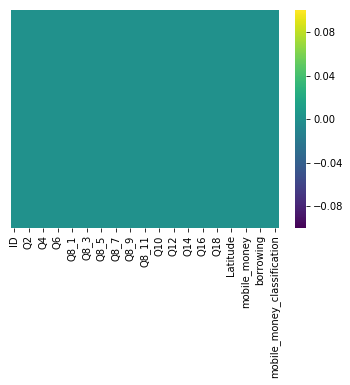

In [194]:
# check if the data has missing points with seaborn heatmap
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False, cmap='viridis')

In [195]:
# view the columns
train_data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')

In [196]:
cols = ['ID','mobile_money', 'savings', 'borrowing','insurance']
train_data = train_data.drop(cols, axis=1)
x_test = test_data.drop(['ID'], axis=1)

In [197]:
# the classes 
train_data['mobile_money_classification'].unique()

array([0, 3, 2, 1])

so we can classify the data into 4 classes

In [198]:
X = train_data.drop(['mobile_money_classification'], axis=1)
y = train_data['mobile_money_classification']


In [199]:
#names=train_data['feauture_names']

In [200]:
x_test.head(5)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q8_9,Q8_10,Q8_11,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,30,2,1,3,6,2,1,0,0,1,0,0,0,0,0,0,0,0,-1,-1,1,1,6,1,4,5,-1,1,4,-2.596421,32.913584
1,53,1,1,3,1,2,1,0,1,0,0,0,0,0,0,0,0,0,-1,1,-1,2,-1,1,4,1,-1,1,4,-1.778303,34.062640
2,23,2,1,3,5,1,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,4,1,-1,1,1,-1.851789,31.536866
3,30,2,3,3,4,1,2,0,1,0,0,0,0,0,0,1,0,0,-1,1,-1,2,-1,2,-1,1,-1,1,4,-1.235656,34.229012
4,28,2,1,5,4,2,1,0,0,0,1,0,0,0,0,0,0,0,-1,-1,-1,1,4,1,6,4,3,1,2,-7.780934,35.691878


In [201]:
#lets normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X_test1=scaler.fit_transform(x_test)

In [202]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.3, learning_rate = 0.1,
               max_depth = 10, alpha = 10, gamma=0.2, n_estimators = 320)
scores1 = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    xg_reg.fit(X_train, y_train)
    scores1.append(xg_reg.score(X_test, y_test))

#xg_reg.fit(X,y)

#preds = xg_reg.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))

Train Index:  [ 710  711  712 ... 7091 7092 7093] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

Train Index:  [   0    1    2 ... 7091 7092 7093] 

Test Index:  [2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142 2143
 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156 2157
 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170 2171
 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183 2184 2185
 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198 2199
 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213
 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227
 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241
 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255
 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269
 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283
 2284 2285 2286 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297
 2298 2299 2300 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311
 2312 2313 2

Train Index:  [   0    1    2 ... 7091 7092 7093] 

Test Index:  [4258 4259 4260 4261 4262 4263 4264 4265 4266 4267 4268 4269 4270 4271
 4272 4273 4274 4275 4276 4277 4278 4279 4280 4281 4282 4283 4284 4285
 4286 4287 4288 4289 4290 4291 4292 4293 4294 4295 4296 4297 4298 4299
 4300 4301 4302 4303 4304 4305 4306 4307 4308 4309 4310 4311 4312 4313
 4314 4315 4316 4317 4318 4319 4320 4321 4322 4323 4324 4325 4326 4327
 4328 4329 4330 4331 4332 4333 4334 4335 4336 4337 4338 4339 4340 4341
 4342 4343 4344 4345 4346 4347 4348 4349 4350 4351 4352 4353 4354 4355
 4356 4357 4358 4359 4360 4361 4362 4363 4364 4365 4366 4367 4368 4369
 4370 4371 4372 4373 4374 4375 4376 4377 4378 4379 4380 4381 4382 4383
 4384 4385 4386 4387 4388 4389 4390 4391 4392 4393 4394 4395 4396 4397
 4398 4399 4400 4401 4402 4403 4404 4405 4406 4407 4408 4409 4410 4411
 4412 4413 4414 4415 4416 4417 4418 4419 4420 4421 4422 4423 4424 4425
 4426 4427 4428 4429 4430 4431 4432 4433 4434 4435 4436 4437 4438 4439
 4440 4441 4

Train Index:  [   0    1    2 ... 6382 6383 6384] 

Test Index:  [6385 6386 6387 6388 6389 6390 6391 6392 6393 6394 6395 6396 6397 6398
 6399 6400 6401 6402 6403 6404 6405 6406 6407 6408 6409 6410 6411 6412
 6413 6414 6415 6416 6417 6418 6419 6420 6421 6422 6423 6424 6425 6426
 6427 6428 6429 6430 6431 6432 6433 6434 6435 6436 6437 6438 6439 6440
 6441 6442 6443 6444 6445 6446 6447 6448 6449 6450 6451 6452 6453 6454
 6455 6456 6457 6458 6459 6460 6461 6462 6463 6464 6465 6466 6467 6468
 6469 6470 6471 6472 6473 6474 6475 6476 6477 6478 6479 6480 6481 6482
 6483 6484 6485 6486 6487 6488 6489 6490 6491 6492 6493 6494 6495 6496
 6497 6498 6499 6500 6501 6502 6503 6504 6505 6506 6507 6508 6509 6510
 6511 6512 6513 6514 6515 6516 6517 6518 6519 6520 6521 6522 6523 6524
 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535 6536 6537 6538
 6539 6540 6541 6542 6543 6544 6545 6546 6547 6548 6549 6550 6551 6552
 6553 6554 6555 6556 6557 6558 6559 6560 6561 6562 6563 6564 6565 6566
 6567 6568 6

In [203]:
import xgboost as xgb
from xgboost import XGBClassifier
xg_reg1 = XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.3, learning_rate = 0.1,
               max_depth = 10, alpha = 10, gamma=0.2, n_estimators = 320)
xg_reg1.fit(X,y,eval_metric='auc')


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.2, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=320, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [204]:
print('Start Predicting')
predictions=xg_reg1.predict(X_test)
pred_proba=xg_reg1.predict_proba(X_test)[:,1]
print('score:%.4g'% metrics.accuracy_score(y_test,predictions))

Start Predicting


NameError: name 'metrics' is not defined

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
scores = []
rf = RandomForestClassifier(random_state = 42,n_estimators=320)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

In [ ]:
xg_reg.fit(X_train, y_train)
scores1.append(xg_reg.score(X_test, y_test))

In [ ]:
rf.fit(X_train, y_train)
scores.append(rf.score(X_test, y_test))

In [ ]:
print(np.mean(scores1))

In [ ]:
print(np.mean(scores))

In [ ]:
xg_reg.fit(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1400, max_depth=80, min_samples_split=5, 
                             min_samples_leaf=4,max_features='sqrt', bootstrap=True,random_state=42)
rfc .fit(X_train, y_train)


In [ ]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
y_train_labels_fit = labels.fit(y_train)
y_train_lables_trf = labels.transform(y_train)

#x_test = test_data.drop(['ID'], axis=1)
#test_pred = rfc.predict_proba(X_test1)
test_pred = xg_reg.predict(X_test1)


# In[17]:


test_pred = pd.DataFrame(xg_reg.predict_proba(X_test1), columns=labels.classes_)
q = {'ID': test_data["ID"], 'no_financial_services': test_pred[0], 'other_only': test_pred[1],
    'mm_only': test_pred[2], 'mm_plus': test_pred[3]}
df_pred = pd.DataFrame(data=q)
df_pred = df_pred[['ID','no_financial_services', 'other_only', 'mm_only', 'mm_plus'  ]]



In [ ]:
df_pred.head()

In [ ]:
df_pred.to_csv('pred_set.csv', index=False) #save to csv fil

In [ ]:
#df_pred.head()